In [41]:
import pandas as pd 
import numpy as np                   
import seaborn as sns        
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score 

In [9]:
Mouse_Volumes=pd.read_csv("Normalized_Mouse_Volumes.csv")
Mouse_Volumes

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9046271,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,9046272,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,7186863,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,7186864,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,9047288,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,9046993,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,9046994,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
8,7188633,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,7189661,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526


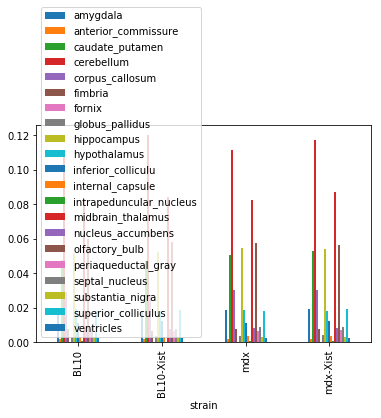

In [10]:
Mouse_Volumes.groupby('strain')['amygdala','anterior_commissure', 'caudate_putamen', 'cerebellum','corpus_callosum', 'fimbria', 'fornix', 'globus_pallidus', 'hippocampus', 'hypothalamus','inferior_colliculu', 'internal_capsule', 'intrapeduncular_nucleus','midbrain_thalamus', 'nucleus_accumbens', 'olfactory_bulb', 'periaqueductal_gray', 'septal_nucleus','substantia_nigra', 'superior_colliculus', 'ventricles'].mean().plot.bar()

In [11]:
Mouse_Volumes1=pd.read_csv("DM_NDM.csv")
Mouse_Volumes1

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9047288,1,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
1,7188633,0,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
2,7189661,0,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
3,7189662,0,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
4,1502140,0,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
5,1502141,0,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619
6,9046270,1,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
7,1502142,0,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
8,1502143,0,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
9,9046273,0,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688


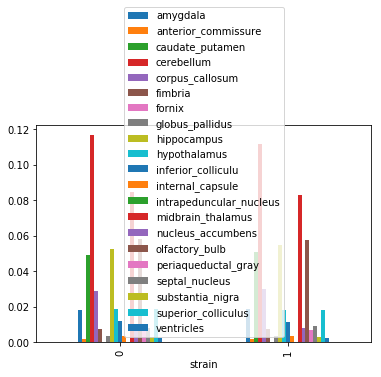

In [12]:
Mouse_Volumes1.groupby('strain')['amygdala','anterior_commissure', 'caudate_putamen', 'cerebellum','corpus_callosum', 'fimbria', 'fornix', 'globus_pallidus', 'hippocampus', 'hypothalamus','inferior_colliculu', 'internal_capsule', 'intrapeduncular_nucleus','midbrain_thalamus', 'nucleus_accumbens', 'olfactory_bulb', 'periaqueductal_gray', 'septal_nucleus','substantia_nigra', 'superior_colliculus', 'ventricles'].mean().plot.bar()

In [13]:
Mouse_Volumes1=Mouse_Volumes1.drop('mouseID', axis=1)
Mouse_Volumes1

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
1,0,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
2,0,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
3,0,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
4,0,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
5,0,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619
6,1,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
7,0,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
8,0,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
9,0,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688


In [14]:
trainN = Mouse_Volumes1.drop([25,26,27,28,29,30])
trainN

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
1,0,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
2,0,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
3,0,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
4,0,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
5,0,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619
6,1,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
7,0,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
8,0,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
9,0,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688


In [15]:
testN = Mouse_Volumes1.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
testN

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
25,1,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
26,0,1,0.017094,0.001890,0.048700,0.118551,0.027120,0.299398,0.006570,0.000396,...,0.003103,0.000477,0.084761,0.007673,0.059037,0.006913,0.007925,0.003012,0.018770,0.002522
27,0,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
28,0,1,0.017761,0.001796,0.045862,0.118328,0.027839,0.300205,0.006457,0.000410,...,0.003049,0.000380,0.081645,0.007243,0.061519,0.006521,0.007488,0.002826,0.019588,0.002427
29,1,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
30,0,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,0.000420,...,0.003201,0.000479,0.084264,0.007705,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478


In [16]:
XN = trainN.drop('strain',1)
XN

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,0.003329,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
1,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,0.003268,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
2,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,0.003207,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
3,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,0.003224,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
4,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,0.003340,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
5,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,0.003424,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619
6,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,0.003704,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
7,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,0.003228,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
8,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,0.003387,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
9,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,0.004097,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688


In [17]:
yN = trainN.strain
yN

0     1
1     0
2     0
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    0
20    0
21    0
22    1
23    0
24    0
Name: strain, dtype: int64

In [18]:
XN=pd.get_dummies(XN)
trainN=pd.get_dummies(trainN)
trainN

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
1,0,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
2,0,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
3,0,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
4,0,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
5,0,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619
6,1,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
7,0,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
8,0,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
9,0,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688


In [19]:
testN=pd.get_dummies(testN)
testN

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
25,1,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
26,0,1,0.017094,0.001890,0.048700,0.118551,0.027120,0.299398,0.006570,0.000396,...,0.003103,0.000477,0.084761,0.007673,0.059037,0.006913,0.007925,0.003012,0.018770,0.002522
27,0,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
28,0,1,0.017761,0.001796,0.045862,0.118328,0.027839,0.300205,0.006457,0.000410,...,0.003049,0.000380,0.081645,0.007243,0.061519,0.006521,0.007488,0.002826,0.019588,0.002427
29,1,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
30,0,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,0.000420,...,0.003201,0.000479,0.084264,0.007705,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478


In [37]:
x_trainN, x_cvN, y_trainN, y_cvN = train_test_split(XN,yN, test_size =0.30)

In [38]:
modelN = LogisticRegression() 
modelN.fit(x_trainN, y_trainN)

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
pred_cvN = modelN.predict(x_cvN)
pred_cvN

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [40]:
accuracy_score(y_cvN,pred_cvN)

0.875

Accuracy_Score for Logistic Regression - 87.5%

---

In [67]:
feature_columns = ['amygdala', 'anterior_commissure', 'caudate_putamen', 'cerebellum', 'corpus_callosum',
           'cortex', 'fimbria', 'fornix', 'globus_pallidus', 'hippocampus', 'hypothalamus', 'inferior_colliculu', 
           'internal_capsule','intrapeduncular_nucleus', 'midbrain_thalamus', 'nucleus_accumbens', 'olfactory_bulb', 
           'periaqueductal_gray','septal_nucleus', 'substantia_nigra', 'superior_colliculus', 'ventricles']
features_array = Mouse_Volumes1[feature_columns].as_matrix()

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [68]:
labels_to_predict_array = Mouse_Volumes1[["strain"]].as_matrix()

C:\Users\LATHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(features_array, labels_to_predict_array, test_size=0.3)

In [79]:
X_train.shape, X_test.shape

((21, 22), (10, 22))

In [80]:
lr_db = LogisticRegression(penalty="l1")

In [81]:
lr_db_fit = lr_db.fit(X_train, np.ravel(Y_train))

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
lr_db_fit.coef_

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [83]:
[(lr_db_fit.coef_[0,i], feature_columns[i]) for i in range(lr_db_fit.coef_.shape[1])]

[(0.0, 'amygdala'),
 (0.0, 'anterior_commissure'),
 (0.0, 'caudate_putamen'),
 (0.0, 'cerebellum'),
 (0.0, 'corpus_callosum'),
 (0.0, 'cortex'),
 (0.0, 'fimbria'),
 (0.0, 'fornix'),
 (0.0, 'globus_pallidus'),
 (0.0, 'hippocampus'),
 (0.0, 'hypothalamus'),
 (0.0, 'inferior_colliculu'),
 (0.0, 'internal_capsule'),
 (0.0, 'intrapeduncular_nucleus'),
 (0.0, 'midbrain_thalamus'),
 (0.0, 'nucleus_accumbens'),
 (0.0, 'olfactory_bulb'),
 (0.0, 'periaqueductal_gray'),
 (0.0, 'septal_nucleus'),
 (0.0, 'substantia_nigra'),
 (0.0, 'superior_colliculus'),
 (0.0, 'ventricles')]

In [84]:
Y_predicted = lr_db_fit.predict(X_test)
Y_predicted.sum(), Y_predicted.sum() / Y_predicted.shape[0]

(0, 0.0)

In [85]:
confusion_matrix(Y_test, Y_predicted, labels=[1.0,0.0])

array([[0, 3],
       [0, 7]], dtype=int64)

In [86]:
{
    "accuracy": accuracy_score(Y_test, Y_predicted), 
    "recall": recall_score(Y_test, Y_predicted),
    "precision": precision_score(Y_test, Y_predicted),
    "f1": f1_score(Y_test, Y_predicted)
}

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


{'accuracy': 0.7, 'recall': 0.0, 'precision': 0.0, 'f1': 0.0}

In [87]:
Y_predicted_p_raw = lr_db_fit.predict_proba(X_test)

In [88]:
Y_predicted_p = Y_predicted_p_raw[:,1]

In [89]:
auc = roc_auc_score(Y_test, Y_predicted_p)
auc

0.5

In [90]:
data_roc_curve = roc_curve(Y_test, Y_predicted_p)

Text(0.6, 0.2, 'AUC=0.500')

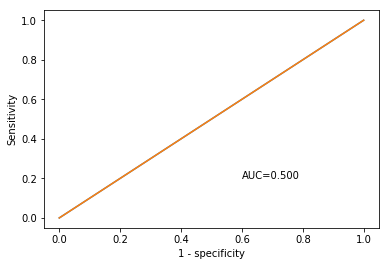

In [91]:
fig, axes = plt.subplots(1)
axes.plot(data_roc_curve[0],data_roc_curve[1])
axes.set_xlabel("1 - specificity")
axes.set_ylabel("Sensitivity")
axes.plot([0,1],[0,1])
axes.text(0.6, 0.2, "AUC=%.3f" % auc)

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [102]:
dct = DecisionTreeClassifier(max_depth=3)

In [103]:
dct_fit = dct.fit(X_train, Y_train)

In [104]:
tY_predicted = dct.predict(X_test)

In [105]:
confusion_matrix(Y_test, tY_predicted, labels=[1,0])

array([[3, 0],
       [2, 5]], dtype=int64)

In [106]:
{
    "accuracy": accuracy_score(Y_test, tY_predicted), 
    "recall": recall_score(Y_test, tY_predicted),
    "precision": precision_score(Y_test, tY_predicted),
    "f1": f1_score(Y_test, tY_predicted)
}

{'accuracy': 0.8, 'recall': 1.0, 'precision': 0.6, 'f1': 0.7499999999999999}

In [112]:
tY_predicted_p_raw1 = lr_db_fit.predict_proba(X_test)

In [113]:
tY_predicted_p = tY_predicted_p_raw1[:,1]

In [114]:
auc = roc_auc_score(Y_test, tY_predicted_p)
auc

0.5

In [117]:
data_roc_curve1 = roc_curve(Y_test, tY_predicted_p)

Text(0.6, 0.2, 'AUC=0.500')

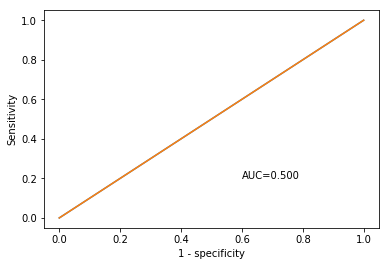

In [118]:
fig, axes = plt.subplots(1)
axes.plot(data_roc_curve1[0],data_roc_curve1[1])
axes.set_xlabel("1 - specificity")
axes.set_ylabel("Sensitivity")
axes.plot([0,1],[0,1])
axes.text(0.6, 0.2, "AUC=%.3f" % auc)

---

Mean StratifiedKFold Accuracy score - 76.2%

In [56]:
from sklearn.model_selection import StratifiedKFold
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for trainN_index,testN_index in kf.split(XN,yN):     
    #print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = XN.loc[trainN_index],XN.loc[testN_index]     
    ytr,yvl = yN[trainN_index],yN[testN_index] 
    modelN = LogisticRegression(random_state=1)     
    modelN.fit(xtr, ytr)     
    pred_test = modelN.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    #i+=1 
    #pred_test = modelN.predict(testN) 
    #pred=modelN.predict_proba(xvl)[:,1]

accuracy_score 0.6666666666666666
accuracy_score 0.8
accuracy_score 0.8
accuracy_score 0.8
accuracy_score 0.75


C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Mean Decision Tree Accuracy score - 63.20%

In [225]:
from sklearn import tree
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for trainN_index,testN_index in kf.split(XN,yN):     
    #print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = XN.loc[trainN_index],XN.loc[testN_index]     
    ytr,yvl = yN[trainN_index],yN[testN_index]         
    modelN = tree.DecisionTreeClassifier(random_state=1)     
    modelN.fit(xtr, ytr)     
    pred_test = modelN.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    #i+=1 
    #pred_test = modelN.predict(testN)

accuracy_score 0.6666666666666666
accuracy_score 0.6
accuracy_score 0.6
accuracy_score 0.8
accuracy_score 0.5


Mean Random Forest Classifier Accuracy score - 83.0%

In [229]:
from sklearn.ensemble import RandomForestClassifier
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for trainN_index,testN_index in kf.split(XN,yN):     
    #print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = XN.loc[trainN_index],XN.loc[testN_index]     
    ytr,yvl = yN[trainN_index],yN[testN_index]         
    modelN = RandomForestClassifier(random_state=1, max_depth=10)     
    modelN.fit(xtr, ytr)     
    pred_testN = modelN.predict(xvl)     
    score = accuracy_score(yvl,pred_testN)     
    print('accuracy_score',score)     
    #i+=1 
    #pred_testN = model.predict(testN)

accuracy_score 1.0
accuracy_score 0.8
accuracy_score 0.8
accuracy_score 0.8
accuracy_score 0.75


C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

---

Logistic regression for mdx and BL10 only

In [184]:
mdx_BL10=Mouse_Volumes.drop([15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
mdx_BL10

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9046271,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,9046272,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,7186863,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,7186864,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,9047288,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,9046993,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,9046994,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
8,7188633,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,7189661,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526


In [185]:
mdx_BL10 = mdx_BL10.drop('mouseID',1)
mdx_BL10

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,0.000419,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
8,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526


In [182]:
#Mdx = Mouse_Volumes[Mouse_Volumes.strain == 'mdx']
#Mdx

In [186]:
train = mdx_BL10.drop([5,6,7,13,14])
train

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
8,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
10,BL10,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
11,BL10,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
12,BL10,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619


In [187]:
test = mdx_BL10.drop([0,1,2,3,4,8,9,10,11,12])
test

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
5,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,0.000419,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
13,BL10,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
14,BL10,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434


In [188]:
X = train.drop('strain',1)
X

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,0.003704,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,0.003655,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,0.003777,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,0.003842,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,0.003786,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
8,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,0.003268,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,0.003207,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
10,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,0.003224,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
11,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,0.003340,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
12,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,0.003424,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619


In [189]:
y = train.strain
y

0      mdx
1      mdx
2      mdx
3      mdx
4      mdx
8     BL10
9     BL10
10    BL10
11    BL10
12    BL10
Name: strain, dtype: object

In [190]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
train

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_mdx
0,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,0.003704,...,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640,0,1
1,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,0.003655,...,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656,0,1
2,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,0.003777,...,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622,0,1
3,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,0.003842,...,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503,0,1
4,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,0.003786,...,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480,0,1
8,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,0.003268,...,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618,1,0
9,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,0.003207,...,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526,1,0
10,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,0.003224,...,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504,1,0
11,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,0.003340,...,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652,1,0
12,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,0.003424,...,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619,1,0


In [191]:
test=pd.get_dummies(test)
test

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_mdx
5,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,0.003329,...,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542,0,1
6,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,0.003399,...,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534,0,1
7,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,0.000419,0.003417,...,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568,0,1
13,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,0.003228,...,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438,1,0
14,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,0.003387,...,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434,1,0


In [196]:
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [197]:
model = LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [198]:
pred_cv = model.predict(x_cv)
pred_cv

array(['BL10', 'BL10', 'BL10'], dtype=object)

In [199]:
accuracy_score(y_cv,pred_cv)

0.3333333333333333

---

Logistic Regression for All 4 models

In [200]:
Mouse=pd.read_csv("Brain.csv")
Mouse

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9093920,BL10-Xist,1,0.018875,0.002015,0.046876,0.124715,0.027707,0.299924,0.006821,...,0.003234,0.000445,0.086107,0.008105,0.052398,0.005915,0.007954,0.003169,0.019496,0.002296
2,9046273,mdx-Xist,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688
3,1502140,BL10,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
4,7186864,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,9101588,BL10-Xist,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
6,1502142,BL10,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
7,9047288,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
8,9046279,mdx-Xist,1,0.018916,0.001922,0.052165,0.117304,0.030536,0.304539,0.007403,...,0.003635,0.000465,0.086565,0.008222,0.054578,0.007011,0.008495,0.003077,0.019138,0.002467
9,9046993,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534


In [201]:
Mouse = Mouse.drop('mouseID',1)
Mouse

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,BL10-Xist,1,0.018875,0.002015,0.046876,0.124715,0.027707,0.299924,0.006821,0.000453,...,0.003234,0.000445,0.086107,0.008105,0.052398,0.005915,0.007954,0.003169,0.019496,0.002296
2,mdx-Xist,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688
3,BL10,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
4,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,BL10-Xist,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
6,BL10,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
7,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
8,mdx-Xist,1,0.018916,0.001922,0.052165,0.117304,0.030536,0.304539,0.007403,0.000419,...,0.003635,0.000465,0.086565,0.008222,0.054578,0.007011,0.008495,0.003077,0.019138,0.002467
9,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534


In [202]:
train2 = Mouse.drop([26,27,28,29,30])
train2

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,BL10-Xist,1,0.018875,0.002015,0.046876,0.124715,0.027707,0.299924,0.006821,0.000453,...,0.003234,0.000445,0.086107,0.008105,0.052398,0.005915,0.007954,0.003169,0.019496,0.002296
2,mdx-Xist,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688
3,BL10,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
4,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,BL10-Xist,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
6,BL10,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
7,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
8,mdx-Xist,1,0.018916,0.001922,0.052165,0.117304,0.030536,0.304539,0.007403,0.000419,...,0.003635,0.000465,0.086565,0.008222,0.054578,0.007011,0.008495,0.003077,0.019138,0.002467
9,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534


In [203]:
test2 = Mouse.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
test2

,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
26,BL10-Xist,1,0.017749,0.001855,0.048491,0.117272,0.027490,0.296184,0.007126,0.000434,...,0.003299,0.000427,0.085370,0.007410,0.058071,0.006929,0.008457,0.003048,0.018842,0.002507
27,mdx-Xist,1,0.019932,0.002041,0.053345,0.114875,0.030626,0.297713,0.008301,0.000468,...,0.003849,0.000481,0.089052,0.008224,0.056327,0.007497,0.009334,0.003222,0.018877,0.002739
28,BL10,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
29,BL10-Xist,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,0.000420,...,0.003201,0.000479,0.084264,0.007705,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478
30,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503


In [204]:
X2 = train2.drop('strain',1)
X2

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,0.003704,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,1,0.018875,0.002015,0.046876,0.124715,0.027707,0.299924,0.006821,0.000453,0.003815,...,0.003234,0.000445,0.086107,0.008105,0.052398,0.005915,0.007954,0.003169,0.019496,0.002296
2,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,0.004097,...,0.003827,0.000493,0.087343,0.008257,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688
3,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,0.003340,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
4,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,0.003786,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,0.003222,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
6,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,0.003228,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
7,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,0.003329,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
8,1,0.018916,0.001922,0.052165,0.117304,0.030536,0.304539,0.007403,0.000419,0.003977,...,0.003635,0.000465,0.086565,0.008222,0.054578,0.007011,0.008495,0.003077,0.019138,0.002467
9,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,0.003399,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534


In [205]:
y2 = train2.strain
y2

0           mdx
1     BL10-Xist
2      mdx-Xist
3          BL10
4           mdx
5     BL10-Xist
6          BL10
7           mdx
8      mdx-Xist
9           mdx
10          mdx
11     mdx-Xist
12         BL10
13    BL10-Xist
14     mdx-Xist
15    BL10-Xist
16         BL10
17    BL10-Xist
18          mdx
19         BL10
20         BL10
21     mdx-Xist
22    BL10-Xist
23          mdx
24    BL10-Xist
25     mdx-Xist
Name: strain, dtype: object

In [206]:
X2=pd.get_dummies(X2)
train2=pd.get_dummies(train2)
train2

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_BL10-Xist,strain_mdx,strain_mdx-Xist
0,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,0.003704,...,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640,0,0,1,0
1,1,0.018875,0.002015,0.046876,0.124715,0.027707,0.299924,0.006821,0.000453,0.003815,...,0.052398,0.005915,0.007954,0.003169,0.019496,0.002296,0,1,0,0
2,1,0.018816,0.002095,0.053317,0.120584,0.028965,0.297061,0.007980,0.000465,0.004097,...,0.059765,0.007850,0.008835,0.003213,0.018676,0.002688,0,0,0,1
3,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,0.003340,...,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652,1,0,0,0
4,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,0.003786,...,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480,0,0,1,0
5,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,0.003222,...,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275,0,1,0,0
6,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,0.003228,...,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438,1,0,0,0
7,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,0.003329,...,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542,0,0,1,0
8,1,0.018916,0.001922,0.052165,0.117304,0.030536,0.304539,0.007403,0.000419,0.003977,...,0.054578,0.007011,0.008495,0.003077,0.019138,0.002467,0,0,0,1
9,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,0.003399,...,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534,0,0,1,0


In [207]:
test2=pd.get_dummies(test2)
test2

,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,globus_pallidus,...,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_BL10-Xist,strain_mdx,strain_mdx-Xist
26,1,0.017749,0.001855,0.048491,0.117272,0.027490,0.296184,0.007126,0.000434,0.003695,...,0.058071,0.006929,0.008457,0.003048,0.018842,0.002507,0,1,0,0
27,1,0.019932,0.002041,0.053345,0.114875,0.030626,0.297713,0.008301,0.000468,0.004031,...,0.056327,0.007497,0.009334,0.003222,0.018877,0.002739,0,0,0,1
28,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,0.003387,...,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434,1,0,0,0
29,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,0.000420,0.003308,...,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478,0,1,0,0
30,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,0.003842,...,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503,0,0,1,0


In [208]:
x2_train, x2_cv, y2_train, y2_cv = train_test_split(X2,y2, test_size =0.3)

In [209]:
model2 = LogisticRegression() 
model2.fit(x2_train, y2_train)

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [210]:
pred2_cv = model2.predict(x2_cv)
pred2_cv

array(['mdx', 'mdx', 'mdx', 'mdx-Xist', 'mdx', 'mdx-Xist', 'mdx', 'mdx'],
      dtype=object)

In [211]:
accuracy_score(y2_cv,pred2_cv)

0.375

---

In [127]:
Mouse_Volumes

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9046271,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,9046272,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,7186863,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,7186864,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
5,9047288,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,9046993,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,9046994,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
8,7188633,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,7189661,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526


In [128]:
train1 = Mouse_Volumes.drop([5,6,7,13,14,20,21,28,29,30])
train1

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,mdx,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9046271,mdx,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,9046272,mdx,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,7186863,mdx,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,7186864,mdx,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
8,7188633,BL10,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,7189661,BL10,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
10,7189662,BL10,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
11,1502140,BL10,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
12,1502141,BL10,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619


In [129]:
test1 = Mouse_Volumes.drop([0,1,2,3,4,8,9,10,11,12,15,16,17,18,19,22,23,24,25,26,27])
test1

,mouseID,strain,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
5,9047288,mdx,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,...,0.003118,0.000527,0.082885,0.007891,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542
6,9046993,mdx,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,...,0.003199,0.000477,0.082338,0.007941,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534
7,9046994,mdx,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,...,0.003351,0.000497,0.082955,0.007978,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568
13,1502142,BL10,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,...,0.002964,0.000498,0.081848,0.008016,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438
14,1502143,BL10,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,...,0.003206,0.000508,0.084734,0.008387,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434
20,9046280,mdx-Xist,1,0.019498,0.002067,0.053387,0.119329,0.031400,0.292606,0.008535,...,0.003927,0.000462,0.088947,0.007818,0.054665,0.007950,0.009799,0.003078,0.019300,0.002758
21,9046281,mdx-Xist,1,0.018990,0.001988,0.051683,0.117209,0.030098,0.304904,0.007160,...,0.003744,0.000465,0.086778,0.007985,0.055448,0.007182,0.008286,0.003002,0.019817,0.002456
28,9101588,BL10-Xist,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,...,0.003073,0.000473,0.082458,0.007340,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275
29,9101589,BL10-Xist,1,0.017761,0.001796,0.045862,0.118328,0.027839,0.300205,0.006457,...,0.003049,0.000380,0.081645,0.007243,0.061519,0.006521,0.007488,0.002826,0.019588,0.002427
30,9101590,BL10-Xist,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,...,0.003201,0.000479,0.084264,0.007705,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478


In [130]:
X1 = train1.drop('strain',1)
X1

,mouseID,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,internal_capsule,intrapeduncular_nucleus,midbrain_thalamus,nucleus_accumbens,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles
0,9046270,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.003321,0.000481,0.082251,0.008631,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640
1,9046271,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,...,0.003304,0.000472,0.081960,0.008279,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656
2,9046272,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.003463,0.000451,0.083111,0.008524,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622
3,7186863,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,...,0.003737,0.000454,0.083885,0.008097,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503
4,7186864,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.003429,0.000489,0.082645,0.008211,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480
8,7188633,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.003034,0.000488,0.082131,0.007772,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618
9,7189661,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.003123,0.000466,0.082154,0.007883,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526
10,7189662,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.003127,0.000491,0.082118,0.007755,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504
11,1502140,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.003240,0.000528,0.084045,0.008031,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652
12,1502141,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.003411,0.000511,0.084023,0.008259,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619


In [131]:
y1 = train1.strain
y1

0           mdx
1           mdx
2           mdx
3           mdx
4           mdx
8          BL10
9          BL10
10         BL10
11         BL10
12         BL10
15     mdx-Xist
16     mdx-Xist
17     mdx-Xist
18     mdx-Xist
19     mdx-Xist
22    BL10-Xist
23    BL10-Xist
24    BL10-Xist
25    BL10-Xist
26    BL10-Xist
27    BL10-Xist
Name: strain, dtype: object

In [132]:
X1=pd.get_dummies(X1)
train1=pd.get_dummies(train1)
train1

,mouseID,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_BL10-Xist,strain_mdx,strain_mdx-Xist
0,9046270,1,0.018683,0.002136,0.052546,0.107696,0.029775,0.316937,0.007576,0.000475,...,0.059032,0.006749,0.009460,0.002910,0.017965,0.002640,0,0,1,0
1,9046271,1,0.018684,0.002110,0.051463,0.109471,0.030458,0.315805,0.007774,0.000449,...,0.057113,0.006702,0.008989,0.002883,0.017885,0.002656,0,0,1,0
2,9046272,1,0.018990,0.002065,0.051397,0.111386,0.029914,0.312623,0.007720,0.000457,...,0.057302,0.006611,0.009061,0.002943,0.017848,0.002622,0,0,1,0
3,7186863,1,0.020030,0.001911,0.053158,0.111207,0.031373,0.314595,0.007734,0.000425,...,0.052740,0.007070,0.008914,0.002971,0.018024,0.002503,0,0,1,0
4,7186864,1,0.019401,0.001989,0.051033,0.112445,0.031063,0.312263,0.007562,0.000408,...,0.053895,0.006958,0.008792,0.003009,0.018210,0.002480,0,0,1,0
8,7188633,1,0.017801,0.001892,0.047717,0.114176,0.028709,0.305826,0.008003,0.000434,...,0.057993,0.006412,0.009022,0.002972,0.018317,0.002618,1,0,0,0
9,7189661,1,0.018746,0.001851,0.048553,0.109817,0.029846,0.312176,0.007711,0.000420,...,0.059044,0.006235,0.009085,0.003001,0.017539,0.002526,1,0,0,0
10,7189662,1,0.017980,0.001847,0.048655,0.109617,0.030708,0.313413,0.008133,0.000375,...,0.059544,0.006288,0.008984,0.002864,0.018020,0.002504,1,0,0,0
11,1502140,1,0.017662,0.001806,0.047172,0.111404,0.028197,0.306455,0.007603,0.000414,...,0.060517,0.007000,0.008387,0.003016,0.018747,0.002652,1,0,0,0
12,1502141,1,0.019153,0.001909,0.048387,0.107501,0.029908,0.309184,0.008165,0.000421,...,0.058857,0.006468,0.009029,0.003074,0.018082,0.002619,1,0,0,0


In [133]:
test1=pd.get_dummies(test1)
test1

,mouseID,whole_brain,amygdala,anterior_commissure,caudate_putamen,cerebellum,corpus_callosum,cortex,fimbria,fornix,...,olfactory_bulb,periaqueductal_gray,septal_nucleus,substantia_nigra,superior_colliculus,ventricles,strain_BL10,strain_BL10-Xist,strain_mdx,strain_mdx-Xist
5,9047288,1,0.017909,0.001939,0.047927,0.114243,0.029266,0.301909,0.007745,0.000411,...,0.060829,0.006651,0.008909,0.003055,0.019110,0.002542,0,0,1,0
6,9046993,1,0.018472,0.001862,0.048819,0.114663,0.029138,0.301023,0.008130,0.000411,...,0.061084,0.006836,0.009194,0.003013,0.017637,0.002534,0,0,1,0
7,9046994,1,0.018091,0.001888,0.049140,0.112479,0.029204,0.305609,0.008078,0.000419,...,0.060046,0.006741,0.008996,0.003051,0.019081,0.002568,0,0,1,0
13,1502142,1,0.017744,0.001870,0.047020,0.112806,0.028408,0.309997,0.006907,0.000396,...,0.061154,0.006569,0.008090,0.002958,0.018611,0.002438,1,0,0,0
14,1502143,1,0.018060,0.001936,0.047971,0.114223,0.027763,0.301422,0.007034,0.000400,...,0.062598,0.006598,0.007829,0.002970,0.019197,0.002434,1,0,0,0
20,9046280,1,0.019498,0.002067,0.053387,0.119329,0.031400,0.292606,0.008535,0.000462,...,0.054665,0.007950,0.009799,0.003078,0.019300,0.002758,0,0,0,1
21,9046281,1,0.018990,0.001988,0.051683,0.117209,0.030098,0.304904,0.007160,0.000415,...,0.055448,0.007182,0.008286,0.003002,0.019817,0.002456,0,0,0,1
28,9101588,1,0.017680,0.001736,0.045498,0.115601,0.028079,0.310487,0.006498,0.000393,...,0.058874,0.006346,0.007541,0.002989,0.018021,0.002275,0,1,0,0
29,9101589,1,0.017761,0.001796,0.045862,0.118328,0.027839,0.300205,0.006457,0.000410,...,0.061519,0.006521,0.007488,0.002826,0.019588,0.002427,0,1,0,0
30,9101590,1,0.018758,0.001749,0.046273,0.120266,0.027994,0.295074,0.007333,0.000420,...,0.061306,0.007038,0.007911,0.002896,0.018627,0.002478,0,1,0,0


In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x_train1, x_cv1, y_train1, y_cv1 = train_test_split(X1,y1, test_size =0.2)

In [90]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [136]:
model1 = LogisticRegression() 
model.fit(x_train1, y_train1)

C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\LATHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
pred_cv1 = model.predict(x_cv1)
pred_cv1

array(['mdx-Xist', 'mdx-Xist', 'mdx-Xist', 'mdx-Xist', 'mdx-Xist'],
      dtype=object)

In [138]:
accuracy_score(y_cv,pred_cv)

0.5